# NEW VERSION TO HANDLE CHANGES IN LOGGING

In [1]:
import pandas as pd
import numpy as np
import json
import time
import re
import matplotlib.pyplot as plt

from datetime import datetime

filename = 'reports/report_P6.json'

In [2]:
with open(filename, encoding="utf-8") as f:
    target = f.read()
    data = json.loads(target)

In [3]:
data.keys()

dict_keys(['1', '2', '3', '4', '5'])

In [4]:
for el in data.keys():
    print(f"keys in note number {el}: {data[el]['data'].keys()}")
    print(f"data contains new format: {'accept' in data[el]['data'].keys()}")
    #print(f"keys in note number {el}: {data[el].keys()}")

keys in note number 1: dict_keys(['title', 'content', 'date', 'flag', 'marks', 'mouse', 'key', 'dismisslist'])
data contains new format: False
keys in note number 2: dict_keys(['title', 'content', 'date', 'flag', 'marks', 'mouse', 'key', 'sidebar', 'popup', 'toggle', 'dismiss', 'accept', 'dismisslist'])
data contains new format: True
keys in note number 3: dict_keys(['title', 'content', 'date', 'flag', 'marks', 'mouse', 'key', 'sidebar', 'popup', 'toggle', 'dismiss', 'accept', 'dismisslist'])
data contains new format: True
keys in note number 4: dict_keys(['title', 'content', 'date', 'flag', 'marks', 'mouse', 'key', 'sidebar', 'popup', 'toggle', 'dismiss', 'accept', 'dismisslist'])
data contains new format: True
keys in note number 5: dict_keys(['title', 'content', 'date', 'flag', 'marks', 'mouse', 'key', 'sidebar', 'popup', 'toggle', 'dismiss', 'accept', 'dismisslist'])
data contains new format: True


In [5]:
note_number = '2'

data[note_number]['data']['title']
print(data[note_number]['data']['title'])
data[note_number]['data']['content']
# start time
tstamp = data[note_number]['data']['key'][0]['timestamp']
print("Start Time: {}".format(datetime.fromtimestamp((tstamp)/1000.0)))

Happiness is short-lived
Start Time: 2022-07-12 03:01:29.941000


## Writing Length (Words Count)

In [6]:
content = data[note_number]['data']['content'].strip()
print(f"Note length: {len(content)} characters")
print(f"Note length: {len(content.split(' '))} words")

Note length: 2180 characters
Note length: 421 words


## Writing Content

In [7]:
# text
print("Full note:")
print(content)
words_in_note = re.sub(r'[^\w\s]', '', content).lower().split(' ')

Full note:
I got a salary hike recently and I was very happy about it. I had been wanting it since March. I remember I started complaining about unfair pay to me since then considering the amount of work I was doing. I was getting paid less than my coworker. It made me feel neglected and displeased. I thought it was unfair.  They gave me full virtual work and I was happy about it, but soon after I caught myself complaining about the pay and the lack of recognition and appreciation. I started comparing myself with my coworkers and the amount of work they did compared to what I did. I started looking down on them and I think I also started talking a bit rudely with them. I used to also get stressed very easily, I think I also had aches and pains. But soon, I started to let it go, I told myself I need to have more gratitude because I can work virtually but the thought that I should get paid more never went away. Recently now my boss msged me saying they would offer me a salary hike and i 

In [8]:
import os
from pathlib import Path

pkl_file = Path(os.getcwd())
pkl_file = pkl_file.parents[0] / 'dict' / 'pickled-dict-full.pkl'
print(pkl_file)

unpickle_dict = pd.read_pickle(pkl_file)
expanded = unpickle_dict.explode('wordnet_ext').reset_index(drop=True)
expanded = expanded.explode('phrase_ext').reset_index(drop=True)

/Users/royjara/dev/hci_lab/journal/dict/pickled-dict-full.pkl


In [9]:
expanded['Word'] = expanded['Word'].str.strip()
expanded['wordnet_ext'] = expanded['wordnet_ext'].str.strip()
expanded['phrase_ext'] = expanded['phrase_ext'].str.strip()

In [10]:
target_words = pd.unique(expanded['Word'].dropna().apply(lambda x: x.strip()))
target_words = np.append(target_words, pd.unique(expanded['wordnet_ext'].dropna().apply(lambda x: x.strip())))
target_words = np.append(target_words, pd.unique(expanded['phrase_ext'].dropna().apply(lambda x: x.strip())))

In [11]:
def get_ngram(alist, n):# {
    holder = []
    for i in range(len(alist) - (n-1)): 
        temp = alist[i]
        for j in range(1,n):
            temp = temp+ " " + alist[i + j]
        holder.append(temp)
    return holder

In [12]:
words_to_analyze = words_in_note + get_ngram(words_in_note, 2)
words_to_analyze = words_to_analyze + get_ngram(words_in_note, 3)

In [13]:
filtered_content = [x for x in words_to_analyze if x in target_words]

In [14]:
cat_dict = {}

for word in filtered_content:
    # find category it belongs to
    res = expanded[expanded['Word'].str.fullmatch(word, na=False) ]
    cat = ''
    if len(res) > 0:
        cat = res['Strategy No.'].values[0]
        # print(cat)
    else:
        res = expanded[expanded['wordnet_ext'].str.fullmatch(word, na=False) ]
        if len(res) > 0:
            cat = res['Strategy No.'].values[0]
            # print(cat)
        else:
            res = expanded[expanded['phrase_ext'].str.fullmatch(word, na=False) ]
            if len(res) > 0:
                cat = res['Strategy No.'].values[0]
                # print(cat)
            else: 
                pass
                # print('not found')
            
    # print('*********************************')
    
    if cat in cat_dict.keys():
        cat_dict[cat]+=1
    else:
        cat_dict[cat] = 1

cat_dict = dict(sorted(cat_dict.items()))

print(f"results: {cat_dict}")

results: {'L2a': 2, 'L2b': 10, 'L2d': 2, 'L2e': 18, 'L2f': 9}


([<matplotlib.axis.XTick at 0x7fb2241e2070>,
 [Text(0, 0, 'L2a'),
  Text(1, 0, 'L2b'),
  Text(2, 0, 'L2d'),
  Text(3, 0, 'L2e'),
  Text(4, 0, 'L2f')])

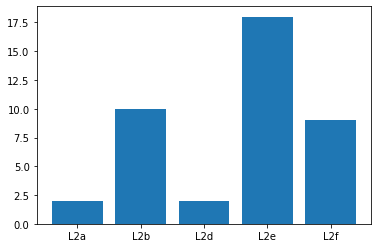

In [15]:
plt.bar(range(len(cat_dict)), list(cat_dict.values()), align='center')
plt.xticks(range(len(cat_dict)), list(cat_dict.keys()))

## Writing Behavior

JS EVT TIMESTAMP ==> TIME IN MILLISECONDS!


Analysis approach:
- no need to know actual time, just the difference between events
- plot the timestamps in the same order as indices.
- then bundle up all the rising ones as one session
- then analyze per session and combine!

<AxesSubplot:>

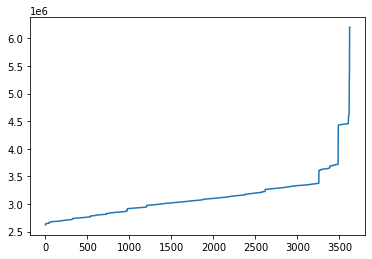

In [16]:
df = pd.DataFrame(data[note_number]['data']['key'])
df = df.drop([0])
df["timestamp"].plot()

In [17]:
df['timestamp_diff'] = df['timestamp'].diff()
df['session_id'] = df.apply(lambda row: 1 if row['timestamp_diff'] < 0 else 0, axis=1).cumsum()
df['pauses'] = df.apply(lambda row: 1 if row['timestamp_diff'] > 3000 else 0, axis=1)
df[['text', 'cursor', 'timestamp', 'session_id', 'timestamp_diff', 'pauses']][df['pauses']==1].head(10)

,text,cursor,timestamp,session_id,timestamp_diff,pauses
2,,"{'line': 0, 'ch': 0, 'sticky': None}",2640828.4,0,18950.4,1
9,,"{'line': 0, 'ch': 0, 'sticky': None}",2647175.2,0,4625.4,1
47,I,"{'line': 0, 'ch': 1, 'sticky': None}",2669817.7,0,16507.1,1
56,I got a s,"{'line': 0, 'ch': 9, 'sticky': None}",2674823.0,0,3972.9,1
208,I got a salary hike recently and I was very ha...,"{'line': 0, 'ch': 60, 'sticky': None}",2703027.5,0,3930.6,1
321,I got a salary hike recently and I was very ha...,"{'line': 0, 'ch': 153, 'sticky': None}",2727851.6,0,4060.1,1
327,I got a salary hike recently and I was very ha...,"{'line': 0, 'ch': 157, 'sticky': None}",2738407.5,0,10106.3,1
537,I got a salary hike recently and I was very ha...,"{'line': 0, 'ch': 262, 'sticky': None}",2783302.2,0,16244.5,1
595,I got a salary hike recently and I was very ha...,"{'line': 0, 'ch': 313, 'sticky': None}",2795494.0,0,4379.1,1
725,I got a salary hike recently and I was very ha...,"{'line': 0, 'ch': 386, 'sticky': None}",2826999.5,0,12459.7,1


In [18]:
pause_list = df.index[df['pauses'] == 1].tolist()
# print(df.iloc[pause_list].columns)
# print(df.iloc[pause_list][['timestamp', 'text', 'marks', 'placeholder','session_id']].to_dict('records'))
print(df.loc[pause_list]['timestamp_diff'].sum()/1000)

3006.201000000477


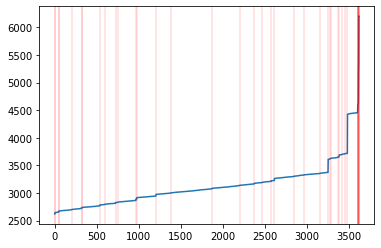

In [19]:
df["timestamp"].div(1000).round(2).plot()
[plt.axvline(_x, linewidth=0.2, color='r') for _x in pause_list]
# missing ax labels (x-keystroke event, y-timestamp) 
# larger size
# red overlay lines represent pauses
# prev big drop was the resetting of the session --> has been adjusted to make continuous. 

In [20]:
#TODO same plot as above but include all the events that occur
# -- interaction with features
df_key = pd.DataFrame(data[note_number]['data']['key'])
df_toggle =  pd.DataFrame(data[note_number]['data']['toggle'])
df_sidebar =  pd.DataFrame(data[note_number]['data']['sidebar'])
df_popup =  pd.DataFrame(data[note_number]['data']['popup'])
df_dismiss =  pd.DataFrame(data[note_number]['data']['dismiss'])
df_accept =  pd.DataFrame(data[note_number]['data']['accept'])

# dismiss', 'accept', 'dismisslist

In [21]:
df_dismiss = df_dismiss[df_dismiss['type']!='start']
df_dismiss = df_dismiss.assign(type = 'dismiss')
df_accept = df_accept[df_accept['type']!='start']
df_accept = df_accept.assign(type = 'accept')

NameError: name 'concat1' is not defined

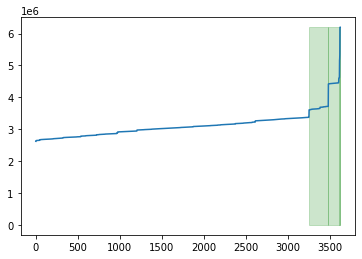

In [23]:
filteredL2 = df_toggle[df_toggle['type']=='toggleL2']
concat1 = pd.concat([df_key, filteredL2]).sort_values(by="timestamp")
concat1 = concat1[concat1['type']!='start'].reset_index()
# L2 on and off
L2_toggleOn_list = concat1.index[(concat1['type'] == 'toggleL2') & (concat1['activated'] == True)].tolist()
L2_toggleOff_list = concat1.index[(concat1['type'] == 'toggleL2') & (concat1['activated'] == False)].tolist()

concat1["timestamp"].round(2).plot() # x-axis: indices, 
y_max = concat1["timestamp"].max() # /1000

for enum, val in enumerate(L2_toggleOn_list):
    try:
        start_idx = val
        end_idx = L2_toggleOff_list[enum]
    except IndexError:
        end_idx = len(concat1["timestamp"])
    # print(f"start_idx {start_idx}, end_idx: {end_idx}")
    plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color='green', alpha=0.2)

In [24]:
concat1b = pd.concat([concat1, df_sidebar, df_popup]).sort_values(by='timestamp')
concat1b = concat1b[concat1b['type']!='start'].reset_index() 

popup_evts = concat1b.index[concat1b['type'] == "popup"].tolist()
sidebar_evts = concat1b.index[concat1b['type'] == "sidebar"].tolist()
print(f"pop: {popup_evts}\n sidebar: {sidebar_evts}\n")

concat1["timestamp"].round(2).plot(marker='o', markevery=popup_evts+sidebar_evts, markeredgewidth=0, markerfacecolor=(1,0,0,0.3), markersize=6)
y_max = concat1["timestamp"].max() # /1000

for enum, val in enumerate(L2_toggleOn_list):
    try:
        start_idx = val
        end_idx = L2_toggleOff_list[enum]
    except IndexError:
        end_idx = len(concat1["timestamp"])
    # print(f"start_idx {start_idx}, end_idx: {end_idx}")
    plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color='green', alpha=0.2, zorder=0)

pop: [3255, 3256, 3489, 3490, 3493, 3495, 3497, 3499, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3515, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3527, 3529, 3530, 3533, 3534, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3687, 3688, 3700, 3701, 3702, 3703, 3704, 3705, 3710, 3711, 3712, 3713, 3714, 3715]
 sidebar: [3257, 3258, 3491, 3492, 3494, 3496, 3498, 3500, 3514, 3516, 3526, 3528, 3531, 3532, 3535, 3536, 3707, 3708]



ValueError: markevery=[3255, 3256, 3489, 3490, 3493, 3495, 3497, 3499, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3515, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3527, 3529, 3530, 3533, 3534, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3687, 3688, 3700, 3701, 3702, 3703, 3704, 3705, 3710, 3711, 3712, 3713, 3714, 3715, 3257, 3258, 3491, 3492, 3494, 3496, 3498, 3500, 3514, 3516, 3526, 3528, 3531, 3532, 3535, 3536, 3707, 3708] is iterable but not a valid numpy fancy index

<Figure size 432x288 with 1 Axes>

events: [3485, 3486, 3487, 3488, 3489, 3491, 3492, 3493, 3494, 3496, 3497, 3619, 3624, 3625, 3629, 3634, 3636, 3639, 3640]



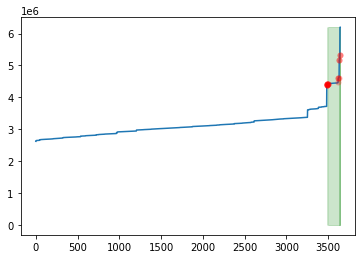

In [25]:
#newer version
filteredL1 = df_toggle[df_toggle['type']=='toggleL1']
concat2 = pd.concat([df_key, filteredL1]).sort_values(by="timestamp")
concat2 = concat2[concat2['type']!='start'].reset_index()

L1_toggleOn_list = concat2.index[concat2['state'] == "Auto Expressiveness on"].tolist()
L1_toggleOff_list = concat2.index[concat2['state'] == "Auto Expressiveness off"].tolist()
L1_events_list = concat2.index[concat2['auto'] == False].tolist()
# print(f"On: {L1_toggleOn_list}\nOff: {L1_toggleOff_list}\n")
print(f"events: {L1_events_list}\n")

plt.plot(concat2.index, concat2['timestamp'], marker='o', markevery=L1_events_list, markeredgewidth=0, markerfacecolor=(1,0,0,0.3), markersize=6)
y_max = concat2['timestamp'].max()

for enum, val in enumerate(L1_toggleOn_list):
    try:
        start_idx = val
        end_idx = L1_toggleOff_list[enum]
    except IndexError:
        end_idx = len(concat2.index)
    # print(f"start_idx {start_idx}, end_idx: {end_idx}")
    plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color='green', alpha=0.2)

# overlay other stuff relevant to L1:
# - edits, dismisses, accepts, 

In [26]:
concat2b = pd.concat([concat2, df_dismiss, df_accept]).sort_values(by='timestamp')
concat2b = concat2b[concat2b['type']!='start'].reset_index() 

accept_evts = concat2b.index[concat2b['type'] == "accept"].tolist()
dismiss_evts = concat2b.index[concat2b['type'] == "dismiss"].tolist()

L1_toggleOn_list = concat2.index[concat2['state'] == "Auto Expressiveness on"].tolist()
L1_toggleOff_list = concat2.index[concat2['state'] == "Auto Expressiveness off"].tolist()
L1_events_list = concat2.index[concat2['auto'] == False].tolist()
# print(f"On: {L1_toggleOn_list}\nOff: {L1_toggleOff_list}\n")
print(f"events: {L1_events_list}\n")

plt.plot(concat2.index, concat2['timestamp'], marker='o', markevery=accept_evts+dismiss_evts, markeredgewidth=0, markerfacecolor=(1,0,0,0.3), markersize=6)
y_max = concat2['timestamp'].max()

for enum, val in enumerate(L1_toggleOn_list):
    try:
        start_idx = val
        end_idx = L1_toggleOff_list[enum]
    except IndexError:
        end_idx = len(concat2.index)
    # print(f"start_idx {start_idx}, end_idx: {end_idx}")
    plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color='green', alpha=0.2)

# overlay other stuff relevant to L1:
# - edits, dismisses, accepts, 

events: [3485, 3486, 3487, 3488, 3489, 3491, 3492, 3493, 3494, 3496, 3497, 3619, 3624, 3625, 3629, 3634, 3636, 3639, 3640]



ValueError: markevery=[3258, 3257, 3492, 3501, 3624, 3626, 3632, 3634, 3638, 3643, 3644, 3645, 3646, 3648, 3651, 3653, 3654, 3655, 3656, 3660, 3662] is iterable but not a valid numpy fancy index

<Figure size 432x288 with 1 Axes>

In [27]:
# writing duration -- aggregate per session_id and add results
a = df.groupby('session_id')['timestamp'].max()
print(f"Writing duration {(a.sum()/1000)/60:.2f} minutes")

Writing duration 103.32 minutes


In [28]:
# save to csv for further inspection.
df[['text', 'cursor', 'timestamp', 'session_id', 'timestamp_diff', 'pauses']][df['pauses']==1].to_csv('pauses.csv')

## Interactions with features

Simplify!
- separate into groups of interactions (columns): dismisses, accepts, l2dismisses
- but at the same time (before or after) 
- find unique for both 

- Marks can be either placeholder (L1/L3) or highlights (L2)
- dismisses are the L1/L3 dismisses
- accepts are the L1/L3 accepts
- l2dismisses are the 
- placeholder only relevant if marks has placeholder

In [ ]:
data[note_number]['data'].keys()

In [ ]:
pd.DataFrame(data[note_number]['data']['sidebar'])

In [ ]:
pd.DataFrame(data[note_number]['data']['popup'])

In [ ]:
pd.DataFrame(data[note_number]['data']['toggle'])

In [ ]:
pd.DataFrame(data[note_number]['data']['dismiss'])

In [1]:
temp = pd.DataFrame(data[note_number]['data']['accept'])
temp[temp['suggestion'] != '']

NameError: name 'pd' is not defined

In [ ]:
pd.DataFrame(data[note_number]['data']['dismisslist'])